# Mounting the google drive

This code imports the required library and then mounts Google Drive and allowing us to access datasets and help to stored the file in the Google Drive

In [299]:
# Mounting the drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessary Header Files

In [300]:
#Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE

# Regression

In [301]:
path1 = "/content/drive/MyDrive/WineQT.csv"

#For Loading the dataset into a Pandas DataFrame
df = pd.read_csv(path1)

#What is the total size of the data frame?
total_size = df.shape
size = df.size
print(f"size of the data frame in the form of Row and Column : {total_size}")

#Actual total Size
print(f"Actual total Size of the DataFrame is: {size} ")

size of the data frame in the form of Row and Column : (1143, 13)
Actual total Size of the DataFrame is: 14859 


In [302]:
#What type of data is each variable (numeric, character, logical, date)?
data_types = df.dtypes
print("\n\nData types of each variable:")
print(data_types)



Data types of each variable:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [303]:
# Do any variables have missing values? Why might that be?
missing_values = df.isnull().sum()
print("\n\nMissing Values in the Datasets are as follows:\n")
print(missing_values)



Missing Values in the Datasets are as follows:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


# Data Cleaning and find the summary statistics of the data

Since the dataset does not contain any null values or missing data, there is no need to perform data cleaning. We can proceed with further analysis and exploration without the necessity of addressing missing values.

In [304]:
df = df.drop_duplicates()
df
#Information of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 125.0 KB


In [305]:
# Display the first few rows of the cleaned DataFrame
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

# Data with Visualization and chart

## Data Visualization with Histogram

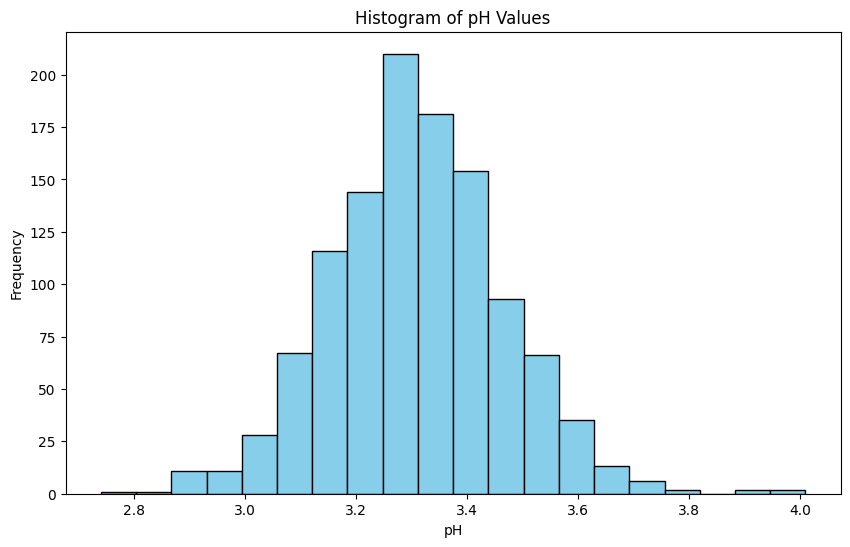

In [306]:
# Create histogram for pH values
plt.figure(figsize=(10, 6))
plt.hist(df['pH'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of pH Values')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()






From the above histogram. The x-axis shows the pH values, ranging from 2.8 to 4.0. The y-axis shows the frequency, or how many times each pH value appears in the sample.

The histogram has a single peak at around pH 3.4, which means that most of the pH values in the sample fall around this value. There are also fewer values at the higher and lower ends of the pH range.

In simpler terms, this histogram suggests that the sample is mostly acidic, with a pH value around 3.4. There are some values that are more basic and some that are more acidic, but they are not as common as the values around 3.4.

## Data Visualization with Scatter Plot

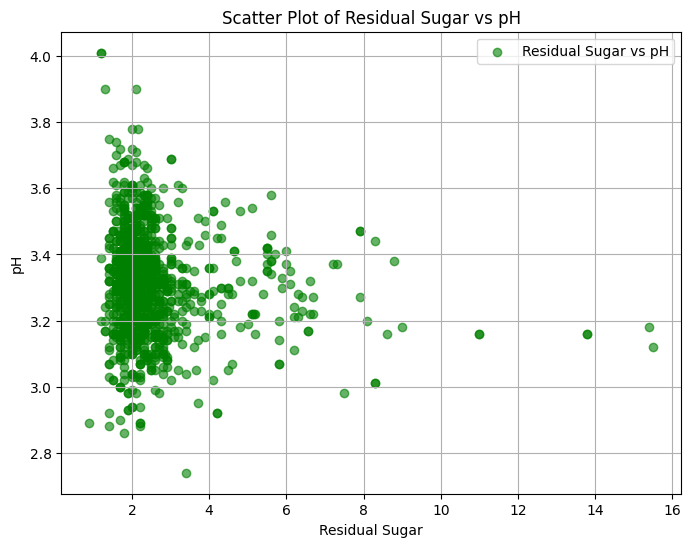

In [307]:
# Create scatter plot for residual sugar vs pH with legend
plt.figure(figsize=(8, 6))
plt.scatter(df['residual sugar'], df['pH'], color='green', alpha=0.6, label='Residual Sugar vs pH')
plt.title('Scatter Plot of Residual Sugar vs pH')
plt.xlabel('Residual Sugar')
plt.ylabel('pH')
plt.grid(True)
plt.legend()
plt.show()

## Data Visualization with Pair Plot

This code creates a scatter plot matrix to visualize the relationships between variables in the DataFrame df wich helps in the exploration of correlations and patterns within the data.

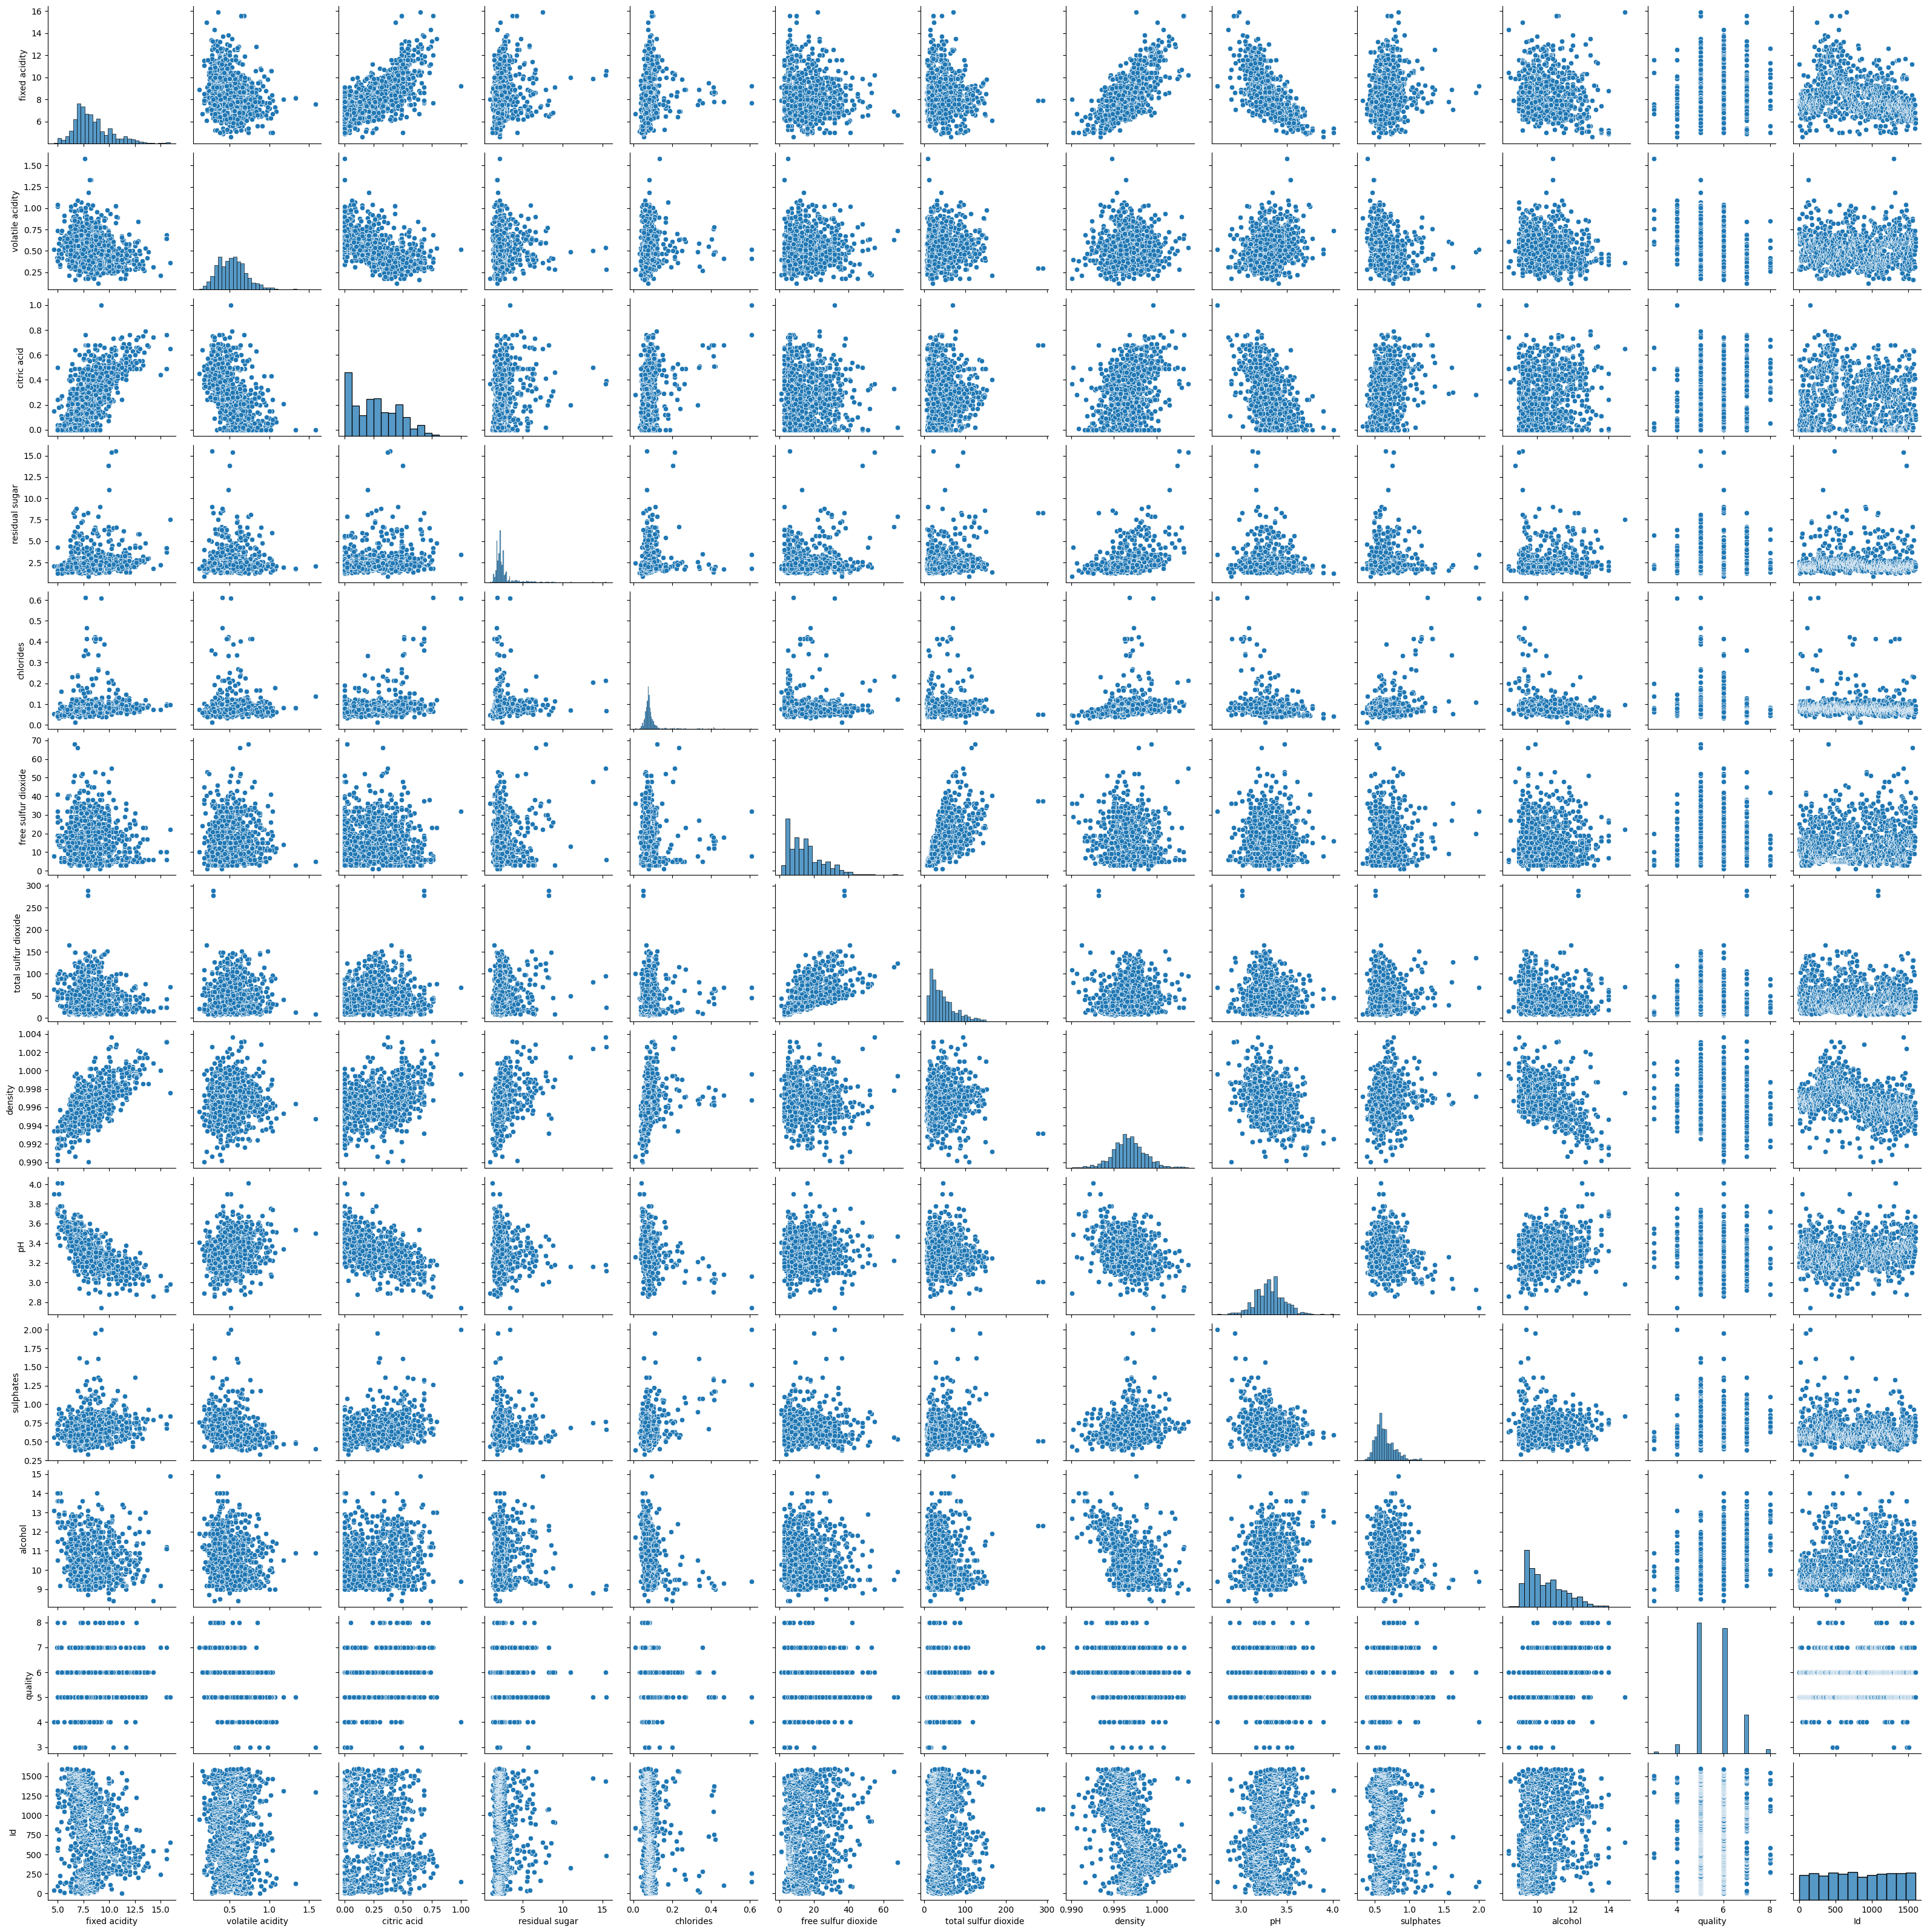

In [308]:
# Visualize pairwise relationships between variables in the DataFrame using a scatter plot matrix.
sns.pairplot(df)
plt.show()

In [309]:
#This is used print the entire row corresponding to the index 40 in the DataFrame df.
row_40 = df.iloc[40]
print(row_40)


fixed acidity            7.8000
volatile acidity         0.5900
citric acid              0.1800
residual sugar           2.3000
chlorides                0.0760
free sulfur dioxide     17.0000
total sulfur dioxide    54.0000
density                  0.9975
pH                       3.4300
sulphates                0.5900
alcohol                 10.0000
quality                  5.0000
Id                      58.0000
Name: 40, dtype: float64


In [310]:
#To print the list of column labels present in the DataFrame df
columns_list = df.columns
print(columns_list)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


# Build Primary Model

## Split the Dataset into Train and Test set

The code splits the dataset into training and testing sets using train_test_split from sklearn.model_selection. This facilitates model training and evaluation.






In [311]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['residual sugar']], df['pH'], test_size=0.2, random_state=42)


In [312]:
# Sanity Check:
if X_train.shape[0] == y_train.shape[0]:
  print("Progress Further")
else:
  print("x_train and y_train are not created correctly")

Progress Further


## Built at least two machine learning model for Regression Task

For the regression task, we've implemented two machine learning models:


1.   Linear Regression and
2.   Random Forest Regression.


Linear Regression and
Random Forest Regression.
Later these models aim to predict a continuous target variable based on the input features.ie pH in this case.

## Model 1: Linear Regression

The below code trains a model to predict the acidity level (pH) of wine using the amount of residual sugar. It then evaluates how well the model performs by calculating the average error in its predictions (MSE) and measuring its overall accuracy (R-squared) on test data.

In [313]:
# Building linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [314]:
# Predicting using linear regression model
linear_model_predictions = linear_regression.predict(X_test)

# Calculating mean squared error for linear regression model
linear_model_mse = mean_squared_error(y_test, linear_model_predictions)

# Printing the mean squared error for linear regression model
print("Model 1: \nLinear Regression")
print("Mean Squared Error:", linear_model_mse)
print("\n")

# Calculate R-squared for linear regression model
linear_model_r2 = r2_score(y_test, linear_model_predictions)
print("R-squared:", linear_model_r2)
print("\n")

Model 1: 
Linear Regression
Mean Squared Error: 0.028593717872859997


R-squared: 0.013568529456147393




## Model 2: Random Forest Regression

The below block of code segment constructs a Random Forest Regression model to predict pH levels using the residual sugar content. It trains the model on the training data and makes predictions on the test data. The mean squared error (MSE) is then computed to measure the model's accuracy in predicting pH values. Additionally, the R-squared value is calculated to evaluate how well the model fits the test data.

In [315]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Building random forest regression model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [316]:
# Predicting using random forest regression model
random_forest_model_predictions = random_forest_model.predict(X_test)

# Calculating mean squared error for random forest regression model
random_forest_model_mse = mean_squared_error(y_test, random_forest_model_predictions)

# Printing the mean squared error for random forest regression model
print("Model 2: \nRandom Forest Regression")
print("Mean Squared Error:", random_forest_model_mse)
print("\n")

# Calculate R-squared for random forest regression model
random_forest_model_r2 = r2_score(y_test, random_forest_model_predictions)
print("R-squared:", random_forest_model_r2)

Model 2: 
Random Forest Regression
Mean Squared Error: 0.030475071418383896


R-squared: -0.051334759887890824


## Evaluate both model on Test Dataset

This code segment evaluates the performance of the Linear Regression and Random Forest Regression models on the test dataset. It prints the Mean Squared Error (MSE) for both models to assess their predictive accuracy. Additionally, it calculates and prints the R-squared values, which indicate how well the models fit the test data.

In [317]:
# Evaluating the Linear Regression Model
print("Evaluation of Linear Regression Model:")
print("Mean Squared Error (MSE) for Linear Regression:", linear_model_mse)
print("\n")

# Evaluating the Random Forest Regression Model
print("Evaluation of Random Forest Regression Model:")
print("Mean Squared Error (MSE) for Random Forest Regression:", random_forest_model_mse)
print("\n")

# Evaluate both models on Test Dataset
linear_model_mse = mean_squared_error(y_test, linear_model_predictions)
random_forest_model_mse = mean_squared_error(y_test, random_forest_model_predictions)

# Evaluate both models on Test Dataset
linear_model_r2 = r2_score(y_test, linear_model_predictions)
random_forest_model_r2 = r2_score(y_test, random_forest_model_predictions)

print("R-squared (Linear Regression):", linear_model_r2)
print("R-squared (Random Forest Regression):", random_forest_model_r2)
print("\n")


Evaluation of Linear Regression Model:
Mean Squared Error (MSE) for Linear Regression: 0.028593717872859997


Evaluation of Random Forest Regression Model:
Mean Squared Error (MSE) for Random Forest Regression: 0.030475071418383896


R-squared (Linear Regression): 0.013568529456147393
R-squared (Random Forest Regression): -0.051334759887890824




## Conclude: Which Model best performed in your dataset

The Linear Regression model outperformed the Random Forest Regression model for predicting pH based on both mean squared error (MSE) and R-squared evaluation metrics. This indicates that the Linear Regression model provides a better fit to the data and yields more accurate predictions of pH levels.

In [318]:
# Conclusion based on MSE comparison for pH prediction
if linear_model_mse < random_forest_model_mse:
    print("Linear Regression Model performed better for predicting pH based on MSE.")
else:
    print("Random Forest Regression Model performed better for predicting pH based on MSE.")

# Conclude: Which Model best performed in your dataset based on R-squared
if linear_model_r2 > random_forest_model_r2:
    print("Linear Regression model performed better for predicting pH based on R-squared.")
elif linear_model_r2 < random_forest_model_r2:
    print("Random Forest Regression model performed better for predicting pH based on R-squared.")
else:
    print("Both models performed equally for predicting pH based on R-squared.")

Linear Regression Model performed better for predicting pH based on MSE.
Linear Regression model performed better for predicting pH based on R-squared.


### Hence here the Linear Regression Model performed better for predicting pH.

## Hyper-parameter Optimization with Cross-Validation

The below code optimizes the hyperparameters of a RandomForestRegressor model using cross-validation. It searches through a predefined parameter grid, finds the best hyperparameters using RandomizedSearchCV, and evaluates the model's performance on the test data. Finally, it prints the best hyperparameters along with performance metrics like mean squared error and R-squared.

In [319]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(),
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = random_search.best_params_
best_model_rf = random_search.best_estimator_

# Evaluate the best model on test data
Y_pred = best_model_rf.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

# Print results
print("Best Hyperparameters:")
print(best_params_rf)
print("\nBest Model:")
print(best_model_rf)
print("\nPerformance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}

Best Model:
RandomForestRegressor(min_samples_split=5, n_estimators=200)

Performance Metrics:
Mean Squared Error: 0.030134979199848404
R-squared: -0.03960219440822277


In [321]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

## Final Linear Regression Model

In [322]:
# Best Features
selected_features_indices = [1, 3, 5]

selected_features_names = df.columns[ selected_features_indices ]

print("Selected Features Column Names:", selected_features_names)


Selected Features Column Names: Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide'], dtype='object')


In [323]:
selected_features_names

Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide'], dtype='object')

# RandomForest Regressor

In [325]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

### Module Predect

In [326]:
y_rf_train_pred= rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

##Evaluate Module Prediction

This code evaluates the Random Forest model's prediction performance by calculating the mean squared error (MSE) and R-squared values for both training and testing data. It assesses how well the model fits the data and generalizes to unseen data, providing insights into its predictive accuracy.

In [327]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE for training and testing data
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)

# Calculate RMSE by taking the square root of MSE
rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

# R-squared values
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print("Train RMSE:", rf_train_rmse)
print("Test RMSE:", rf_test_rmse, "\n")
print("Train R-squared:", rf_train_r2)
print("Test R-squared:", rf_test_r2)


Train RMSE: 0.1452135736135021
Test RMSE: 0.17126128413541952 

Train R-squared: 0.09698554756483813
Test R-squared: -0.011846616226251827


In [328]:
rf_results = pd.DataFrame(['Random Forest', rf_train_rmse, rf_test_rmse, rf_train_r2, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training RMSE', 'Testing RMSE', 'Traning R^2', 'Testing R^2']
rf_results

Method Training RMSE Testing RMSE Traning R^2 Testing R^2
0  Random Forest      0.145214     0.171261    0.096986   -0.011847

#Classification

In [329]:
path2 = "/content/drive/MyDrive/diabetes.csv"

#For Loading the dataset into a Pandas DataFrame
data = pd.read_csv(path2)

#What is the total size of the data frame?
total_size = data.shape
size = data.size
print(f"size of the data frame in the form of Row and Column : {total_size}")

#Actual total Size
print(f"Actual total Size of the DataFrame is: {size} ")

size of the data frame in the form of Row and Column : (768, 9)
Actual total Size of the DataFrame is: 6912 


In [330]:
#What type of data is each variable (numeric, character, logical, date)?
data_types = data.dtypes
print("\n\nData types of each variable:")
print(data_types)



Data types of each variable:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [331]:
# Do any variables have missing values? Why might that be?
missing_values = data.isnull().sum()
print("\n\nMissing Values in the Datasets are as follows:\n")
print(missing_values)



Missing Values in the Datasets are as follows:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



# Data Cleaning and find the summary statistics of the data
Since this dataset does not contain any null values or missing data, there is no need to perform data cleaning. We can proceed with further analysis and exploration without the necessity of addressing missing values.

In [332]:
df = data.drop_duplicates()
df
#Information of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [333]:
# Display the first few rows of the cleaned DataFrame
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Visualization and chart

## Data Visualization with Seaborn Countplot

This code creates a countplot using seaborn to visualize the distribution of categories in the 'Outcome' column of the DataFrame 'data'.

<Axes: xlabel='Outcome', ylabel='count'>

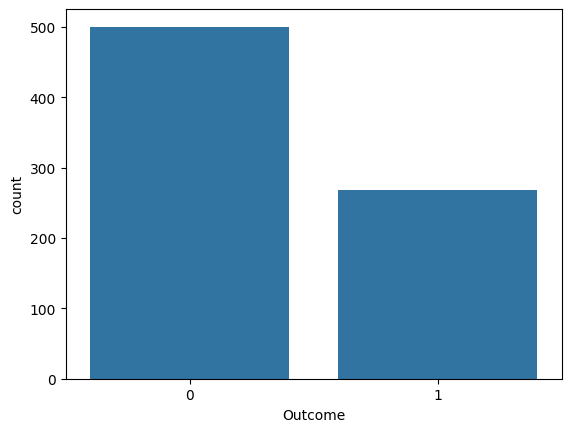

In [334]:
# Visualize the count of different categories in the 'Outcome' column using a seaborn countplot
sns.countplot(x='Outcome', data=data)


## Data Visualization with Seaborn PairPlot

This code generates a pairplot using seaborn to visualize the pairwise relationships between variables in the dataset 'data'.

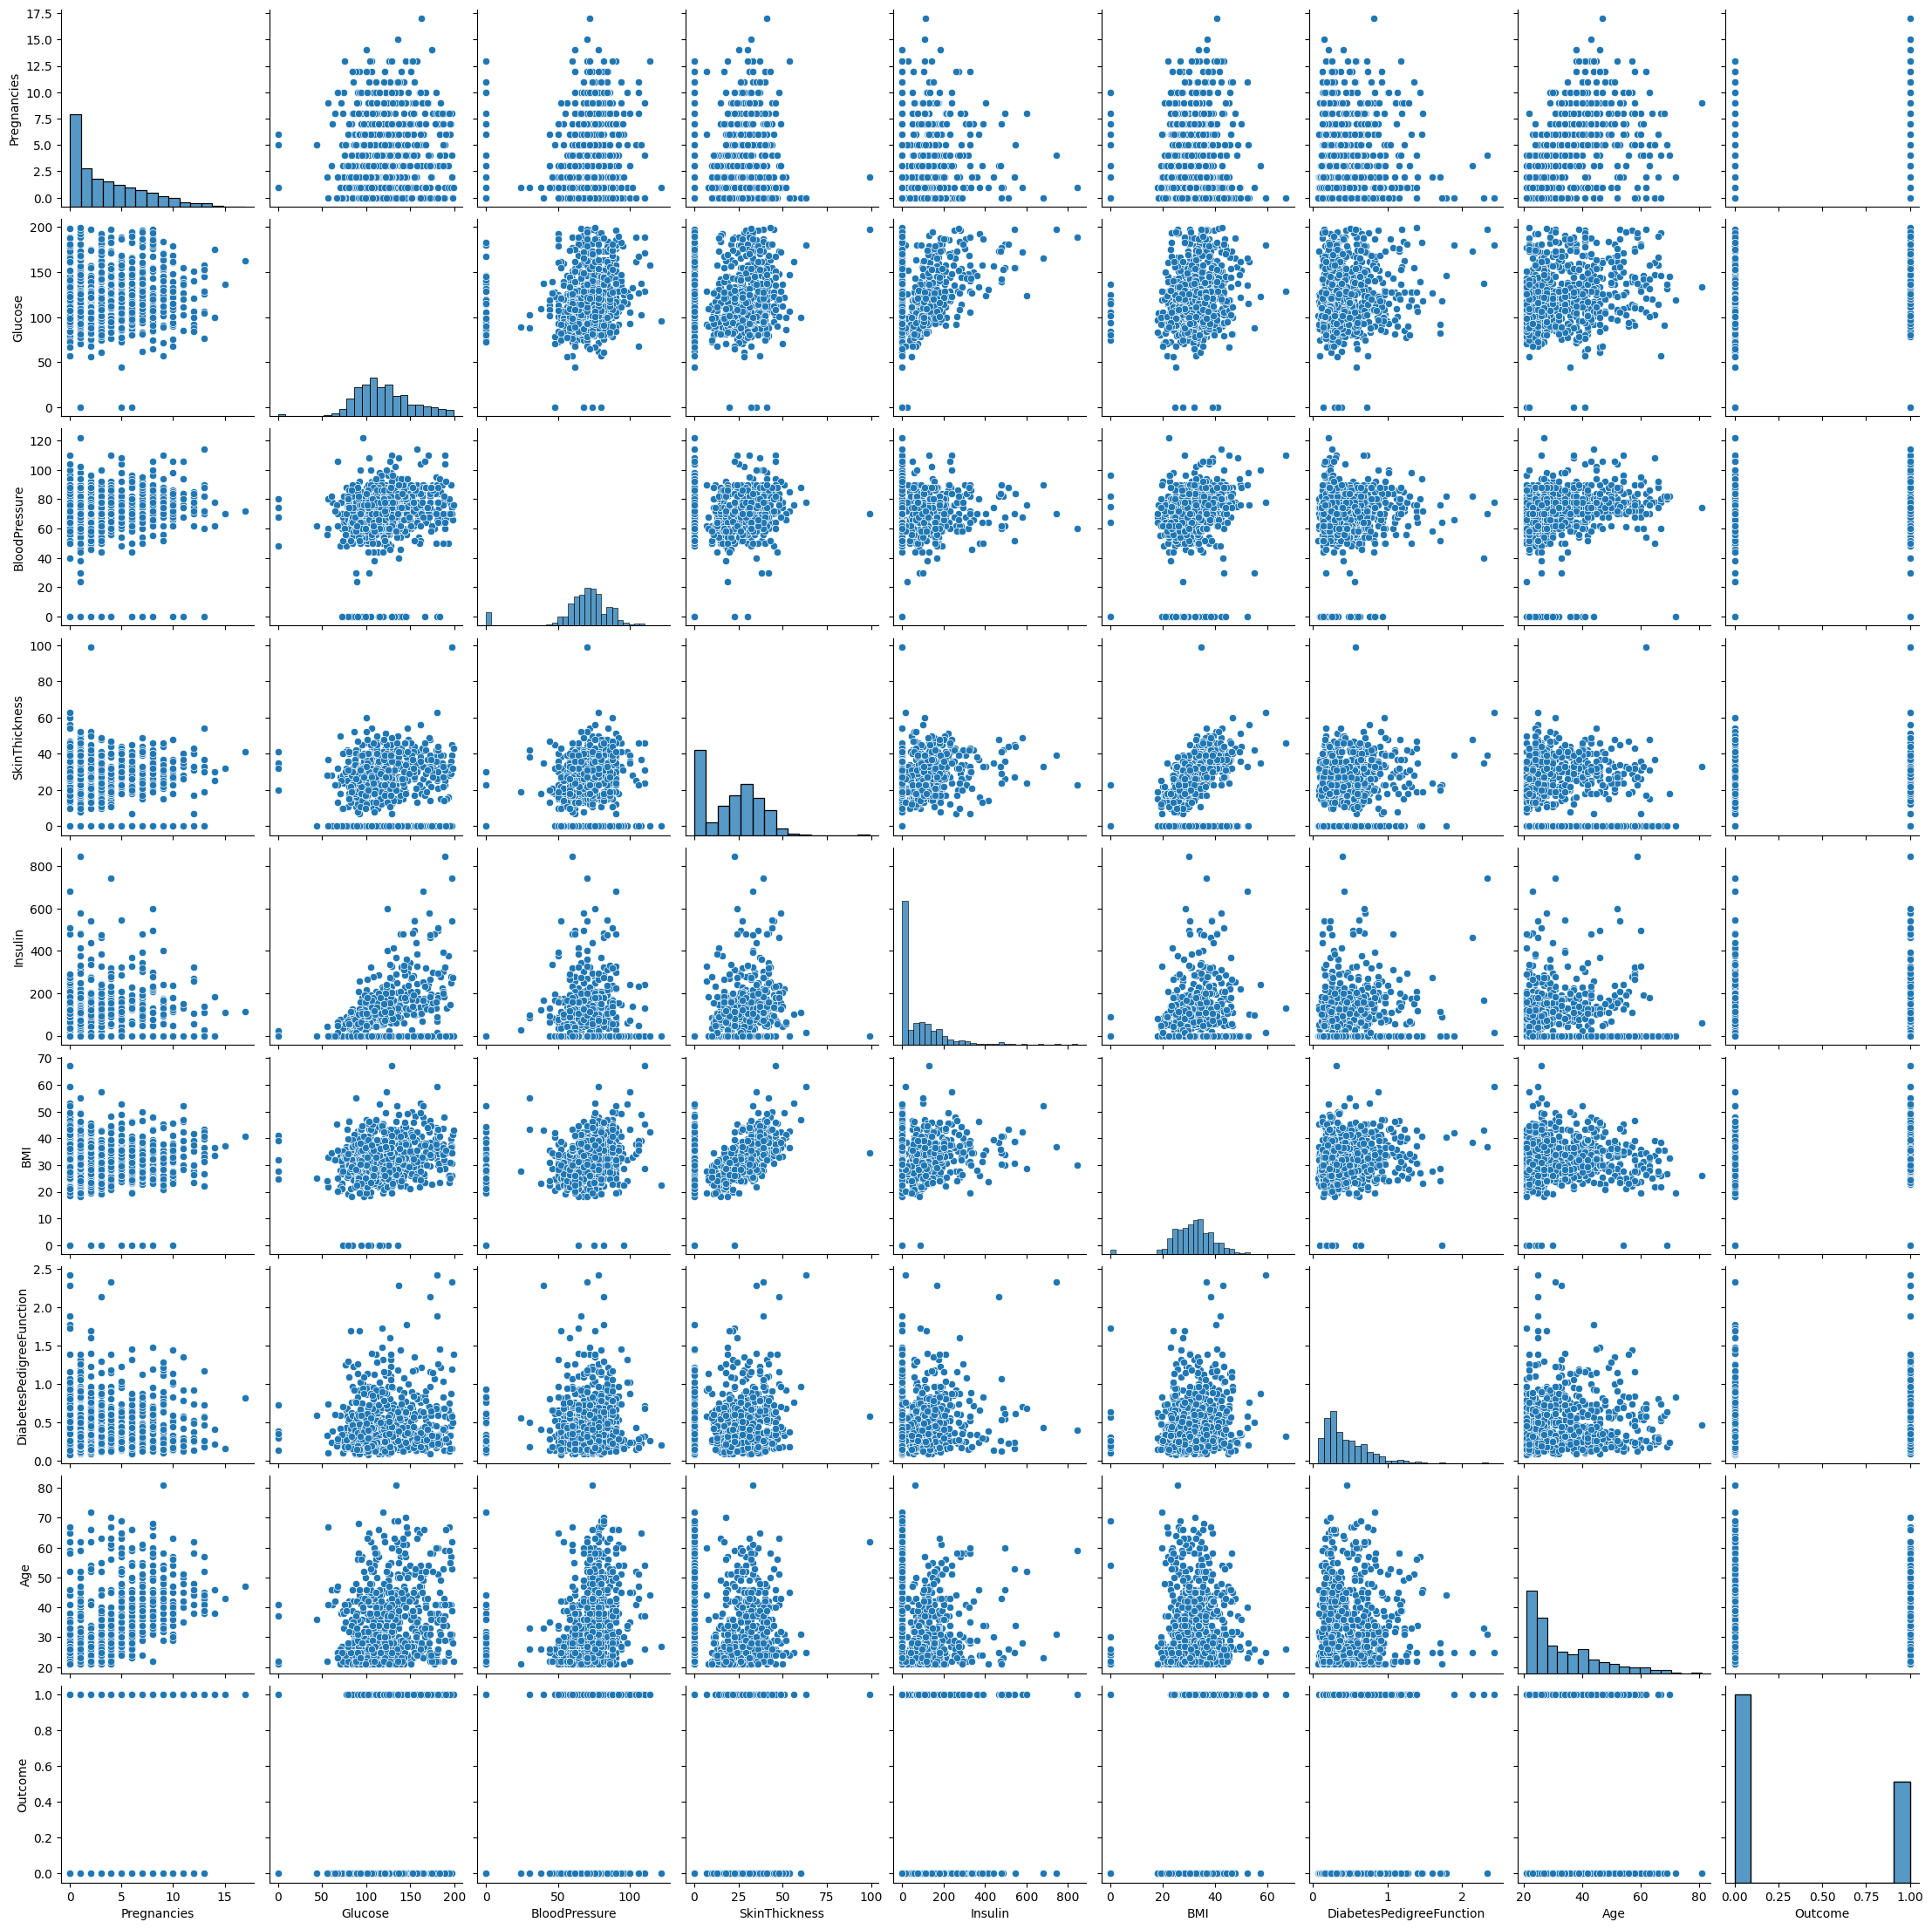

In [335]:
# Visualize pairwise relationships in the dataset using seaborn pairplot
sns.pairplot(data)
plt.show()


In [336]:
# Display the first 3 rows of the dataset and store the result
data_head = data.head(3)
print(data_head)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  


In [337]:
# Display the column names of the dataset
data_columns = data.columns
print(data_columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [338]:
# Extracting features (independent variables) and target variable from the dataset
X = data.iloc[:, :-1].values  # Features
Y = data.iloc[:, -1].values   # Target variable


In [339]:
# Performing a sanity check to ensure that the features and target variable are created correctly
if X.shape[0] == Y.shape[0]:
    print("Both X and Y are created correctly.")
else:
    print("X and Y are not created correctly.")


Both X and Y are created correctly.


In [340]:
# Get unique values of the target variable Y
unique_values = np.unique(Y)
print("Unique values of Y:", unique_values)

Unique values of Y: [0 1]


# By Using Sklearn Logistic

The code prepares the dataset by splitting it into features (X) and the target variable (y). It then further splits the data into training and testing sets using the train_test_split function from scikit-learn.

In [341]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Split the dataset into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [342]:
# Sanity Check:
if X_train.shape[0] == y_train.shape[0]:
  print("Progress Further")
else:
  print("x_train and y_train are not created correctly")

Progress Further


#Build Primary Model

## Logistic Regression

This code standardizes the features in the dataset by subtracting the mean and scaling to unit variance, ensuring that all features have the same scale.

In [343]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [344]:
# Create logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression()

This code creates a logistic regression model, fits it to the standardized training data, and makes predictions on both the training and testing datasets

In [345]:
# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test_scaled)

# Make predictions on the train set
y_train_pred = logistic_model.predict(X_train_scaled)


In [346]:
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)  # Calculate accuracy of model on training data
accuracy_test = accuracy_score(y_test, y_test_pred)  # Calculate accuracy of model on testing data

# Generate classification reports for both training and testing datasets
report_train = classification_report(y_train, y_train_pred)  # Generate classification report for training data
report_test = classification_report(y_test, y_test_pred)  # Generate classification report for testing data

# Print accuracy scores and classification reports
print(f'Training Accuracy: {accuracy_train}')  # Print training accuracy score
print(f'Testing Accuracy: {accuracy_test}')  # Print testing accuracy score
print('\nTraining Classification Report:\n', report_train)  # Print classification report for training data
print('\nTesting Classification Report:\n', report_test)  # Print classification report for testing data


Training Accuracy: 0.7703583061889251
Testing Accuracy: 0.7532467532467533

Training Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



The above block of code evaluates the logistic regression model by calculating accuracy scores for both the training and testing datasets, and generates classification reports to assess model performance in detail.

## Hyper Parameter for logistic regression

This code searches for the best combination of hyperparameters (C and penalty) for logistic regression using a grid search approach with cross-validation. The 'C' parameter controls regularization strength, while 'penalty' specifies the type of regularization penalty. The grid search is performed using 5-fold cross-validation. After fitting the grid search object to the training data, it prints the best hyperparameters found for logistic regression.

In [347]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']
}

# Instantiate logistic regression model
logistic_model = LogisticRegression(solver='lbfgs')
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Logistic Regression:")
print(grid_search.best_params_)


Best hyperparameters for Logistic Regression:
{'C': 10, 'penalty': 'l2'}


## Feature Selection

In this code, RFE is initialized with a logistic regression model that is configured with specific hyperparameters (C=10, penalty='l2'). RFE is then fitted to the training data to select the top 5 features. Finally, it prints the names of the selected features. RFE recursively eliminates features that contribute less to the model performance until the desired number of features is reached.

In [348]:
from sklearn.feature_selection import RFE

# Initialize logistic regression model
logistic_model = LogisticRegression(C=10, penalty='l2')

# Initialize RFE
rfe = RFE(estimator=logistic_model, n_features_to_select=5)

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

print("Selected features using RFE:")
print(selected_features)


Selected features using RFE:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')


## Final model for LogisticRegression

In this code, the dataset is restricted to the best features selected using RFE, including 'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', and 'Age'. Then, the data is split into training and testing sets, followed by standardization of features. The logistic regression model is initialized with the best hyperparameters obtained from hyperparameter optimization. Finally, the model is trained on the training data and used to make predictions on both the training and testing sets.

In [349]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the best features selected using RFE
X = data.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']]
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model with best hyperparameters
logistic_model = LogisticRegression(C=10, penalty='l2')

# Fit the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test_scaled)

# Make predictions on the train set
y_train_pred = logistic_model.predict(X_train_scaled)


The below codes computes the accuracy of the model on both the training and testing datasets using the accuracy_score function. Additionally, it generates classification reports using the classification_report function, which includes precision, recall, F1-score, and support for each class. Finally, it prints out the accuracy and classification reports for both the training and testing datasets.

In [350]:
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print(f'Train Accuracy: {accuracy_train}')
print('\nTrain Classification Report:\n', report_train)

print(f'\nTest Accuracy: {accuracy_test}')
print('\nTest Classification Report:\n', report_test)


Train Accuracy: 0.7703583061889251

Train Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.57      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614


Test Accuracy: 0.7142857142857143

Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



##Decision Tree

This code builds a Decision Tree Classifier model using scikit-learn's DecisionTreeClassifier, trains it on the training data, and then generates predictions for the test set. The predictions (y_pred_tree) contain the class labels predicted by the model for the test data.


In [351]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

In [352]:
y_pred_tree

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [353]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_tree)

array([[76, 23],
       [21, 34]])

In [354]:
# Evaluate the model
#The code calculates the accuracy of a decision tree classifier and generates a classification report summarizing its performance on the test data
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Accuracy (Decision Tree): {accuracy_tree}')
print('\nClassification Report (Decision Tree):\n', report_tree)


Accuracy (Decision Tree): 0.7142857142857143

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



In [355]:
# testing accuracy for test data
tree_model.score(X_test, y_test)

0.7142857142857143

## Hyper-parameter Tuning


This code iterates over different combinations of hyperparameters specified in param_grid using 5-fold cross-validation to find the best combination that maximizes model performance. Finally, it prints the best hyperparameters and evaluates the best model's accuracy on the test set.

In [356]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [357]:

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [358]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best estimator (model) from GridSearchCV
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.7337662337662337


## Decision tree Model with best hyperparameters

This code creates a decision tree classifier model with the specified hyperparameters (criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5). It then trains the model on the training data, makes predictions on the test set, and evaluates the model's performance using accuracy and a classification report.

In [359]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Decision Tree Classifier model with best hyperparameters
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Accuracy (Decision Tree): {accuracy_tree}')
print('\nClassification Report (Decision Tree):\n', report_tree)


Accuracy (Decision Tree): 0.6948051948051948

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.76      0.77      0.76        99
           1       0.57      0.56      0.57        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



## Feature Selection

In [360]:
from sklearn.feature_selection import RFE

# Initialize Decision Tree Classifier model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)

# Initialize RFE
rfe_tree = RFE(estimator=tree_model, n_features_to_select=5)

# Fit RFE on the training data
rfe_tree.fit(X_train, y_train)

# Get the selected features
selected_features_tree = X_train.columns[rfe_tree.support_]

print("Selected features using RFE for Decision Tree Classifier:")
print(selected_features_tree)


Selected features using RFE for Decision Tree Classifier:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')


# Final Module for DecisionTreeClassifiers

This code snippet is used to train a decision tree classifier specifically for the given problem. It's assumed that the data has already been loaded into the variables X and y. The decision tree model is evaluated based on its accuracy and a classification report which includes precision, recall, F1-score, and support for each class.

In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selected features
X_selected = X.loc[:, ['Glucose', 'BloodPressure', 'BMI', 'Age']]
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create Decision Tree Classifier model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Accuracy (Decision Tree): {accuracy_tree}')
print('\nClassification Report (Decision Tree):\n', report_tree)


Accuracy (Decision Tree): 0.6948051948051948

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        99
           1       0.59      0.47      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154

